In [1]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('TkAgg')


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
image = cv2.imread('phone.jpg')
ratio = image.shape[1]/640
height = int(image.shape[0]/ratio)
width = int(image.shape[1]/ratio)
image = cv2.resize(image, (width,height), interpolation=cv2.INTER_LINEAR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
testImg = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)



In [4]:
gX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=3)
gY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=3)
gX = cv2.convertScaleAbs(gX)
gY = cv2.convertScaleAbs(gY)

In [16]:
cv2.imshow("Sobel/Scharr X", gX)
cv2.imshow("Sobel/Scharr Y", gY)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'gX' is not defined

In [17]:
blur = cv2.GaussianBlur(gray, (7,7), cv2.BORDER_DEFAULT)
cv2.imshow("Smoothing", blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
bX = cv2.Sobel(blur, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=3)
bY = cv2.Sobel(blur, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=3)
bX = cv2.convertScaleAbs(bX)
bY = cv2.convertScaleAbs(bY)

In [8]:
cv2.imshow("Sobel/Scharr X", bX)
cv2.imshow("Sobel/Scharr Y", bY)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
magnitude = np.sqrt((bX ** 2) + (bY ** 2))
magnitude.astype(int)
orientation = np.arctan2(bY, bX) * (180 / np.pi) % 180
print(magnitude.shape)

(480, 640)


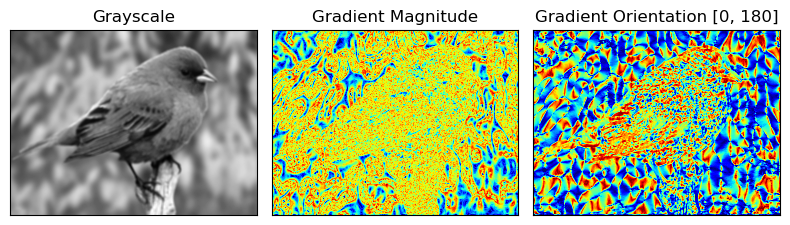

In [10]:
(fig, axs) = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))
# plot each of the images
axs[0].imshow(blur, cmap="gray")
axs[1].imshow(magnitude, cmap="jet")
axs[2].imshow(orientation, cmap="jet")
# set the titles of each axes
axs[0].set_title("Grayscale")
axs[1].set_title("Gradient Magnitude")
axs[2].set_title("Gradient Orientation [0, 180]")
# loop over each of the axes and turn off the x and y ticks
for i in range(0, 3):
	axs[i].get_xaxis().set_ticks([])
	axs[i].get_yaxis().set_ticks([])
# show the plots
plt.tight_layout()
plt.show()

In [11]:
wide = cv2.Canny(blur, 10, 200)

tight = cv2.Canny(blur, 240, 250)


In [12]:
mid = cv2.Canny(blur,0, 255, L2gradient=False) 
cv2.imshow("Mid Edge Map", mid)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
contours, hierarchy = cv2.findContours(image=mid, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)

In [14]:
copy = blur.copy()
cv2.drawContours(blur, contours, -1, color=(0, 254, 0), thickness=3)
cv2.imshow('Contours', blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
print("Number of Contours found = " + str(len(contours))) 

Number of Contours found = 7


In [16]:
thresh = cv2.adaptiveThreshold(blur,500,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv2.THRESH_BINARY,15,2)
print(thresh)
cv2.imshow('Binary image', thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()


[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [17]:
cont, hier = cv2.findContours(thresh, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
image_copy = blur.copy()
cv2.drawContours(image=image, contours=cont, contourIdx=-1, color=(0, 255, 0), thickness=1, lineType=cv2.LINE_AA)
cv2.imshow('None approximation', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
print("Number of Contours found = " + str(len(cont))) 

Number of Contours found = 17


In [19]:
res = cv2.polylines(blur, cont[1], isClosed=True, color=(255, 0, 0), thickness=4)
print(res)

[[ 61  61  61 ...  73  74  75]
 [ 61  61  61 ...  73  74  75]
 [ 61  61  61 ...  72  74  74]
 ...
 [127 127 128 ...  81  82  82]
 [127 127 128 ...  81  82  82]
 [126 127 128 ...  81  82  82]]


In [20]:
cont_info = [(i, cv2.contourArea(i)) for i in cont]

In [21]:
mask = np.ones(testImg.shape, dtype=np.uint8)
mask = cv2.fillConvexPoly(mask, cont[3], [0,0,0])
mult = np.multiply(testImg, mask)


In [22]:
cv2.imshow('Mask', mult)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
print(cv2.contourArea(cont[1]))

0.5


In [24]:
colour = cv2.fillConvexPoly(testImg, cont[3], [255,255,0])
cv2.imshow('Mask', colour)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
print(thresh.dtype)
print(magnitude.dtype)

uint8
float16


In [26]:
def bgremove1(myimage):
 
    # Blur to image to reduce noise
    myimage = cv2.GaussianBlur(myimage,(5,5), 0)
 
    # We bin the pixels. Result will be a value 1..5
    bins=np.array([0,51,102,153,204,255])
    myimage[:,:,:] = np.digitize(myimage[:,:,:],bins,right=True)*51
 
    # Create single channel greyscale for thresholding
    myimage_grey = cv2.cvtColor(myimage, cv2.COLOR_BGR2GRAY)
 
    # Perform Otsu thresholding and extract the background.
    # We use Binary Threshold as we want to create an all white background
    ret,background = cv2.threshold(myimage_grey,50,200,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
    # Convert black and white back into 3 channel greyscale
    background = cv2.cvtColor(background, cv2.COLOR_GRAY2BGR)
 
    # Perform Otsu thresholding and extract the foreground.
    # We use TOZERO_INV as we want to keep some details of the foregorund
    ret,foreground = cv2.threshold(myimage_grey,50,200,cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)  #Currently foreground is only a mask
    foreground = cv2.bitwise_and(myimage,myimage, mask=foreground)  # Update foreground with bitwise_and to extract real foreground
 
    # Combine the background and foreground to obtain our final image
    finalimage = background+foreground
 
    return finalimage

In [27]:
cv2.imshow("somethong", bgremove1(image))
cv2.waitKey(0)
cv2.destroyAllWindows()


In [28]:
print(np.min(gray))

2


In [21]:
CannyAccThresh, matrix = cv2.threshold(src=blur,thresh=0,maxval=255,type=cv2.THRESH_BINARY+cv2.THRESH_OTSU);
print(CannyAccThresh)
cv2.imshow("mCanny_Gray",matrix);
cv2.waitKey(0)
cv2.destroyAllWindows()
CannyThresh = 0.1 * CannyAccThresh;
canny2 = cv2.Canny(blur,CannyThresh,CannyAccThresh, L2gradient=True);
cv2.imshow("mCanny_Gray",canny2);
cv2.waitKey(0)
cv2.destroyAllWindows()

108.0


In [20]:
cont, hier = cv2.findContours(matrix, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
image_copy = image.copy()
cv2.drawContours(image=image_copy, contours=cont, contourIdx=-1, color=(0, 255, 0), thickness=1, lineType=cv2.LINE_AA)
cv2.imshow('None approximation', image_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [31]:
print(len(hier[0]))
print(len(cont))
arr = []
for i in range(len(hier[0])):
    if hier[0][i][0] == -1:
        arr.append(i)
print(hier[0][arr])
contAdj = [cont[i] for i in arr]
print(len(contAdj))


43
43
[[-1 41 -1 -1]]
1


In [32]:
image_copy2 = image.copy()
cv2.drawContours(image=image_copy2, contours=contAdj, contourIdx=-1, color=(0, 255, 0), thickness=1, lineType=cv2.LINE_AA)
cv2.imshow('None approximation', image_copy2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
cv2.imshow('None approximation', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

[Next, Previous, First_Child, Parent] 